<a href="https://colab.research.google.com/github/falahamro/Deep-Learning/blob/main/Kmeans_Clustering_Country_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised Learning**



PROBLEM:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing people in poor countries with basic amenities and relief during times of natural disasters and calamities.

HELP International managed to raise about $10 million. Now, the CEO of the NGO needs to distribute this money strategically and effectively to the countries most in need of humanitarian aid.

OBJECTIVE: our objective is to categorize countries lacking humanitarian resources based on socioeconomic and health factors, with the aim of contributing to CEO decision-making.

METHODOLOGY: The methodology used to develop the project consists of the following steps: exploratory data analysis, data pre-processing and clustering with K-Means. The K-means inertia value will be evaluated without and with dimensionality reduction (PCA). To determine the ideal number of clusters (K) for K-means, the Elbow method will be used. The Silhouette score will also be used as it displays the silhouette coefficient for each sample per cluster, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance or for selecting a value for K.

**IMPORTING LIBRARIES**

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

Load the Data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Challenges /Country Data KMeans/Country-data.csv")

In [26]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Checking the Dimension of the Database

In [27]:
df.shape

(167, 10)

The database has 167 rows and 10 columns

In [28]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [29]:
#CHECKING THE TARGET CLASS DISTRIBUTION
df["country"].value_counts()

Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: country, Length: 167, dtype: int64

In [30]:
#CHECKING MISSING VALUES

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [31]:
#CHECKING DUPLICATE VALUES

df.duplicated().sum()

0

DESCRIPTIVE STATISTICS

In [32]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


DATA DISTRIBUTION

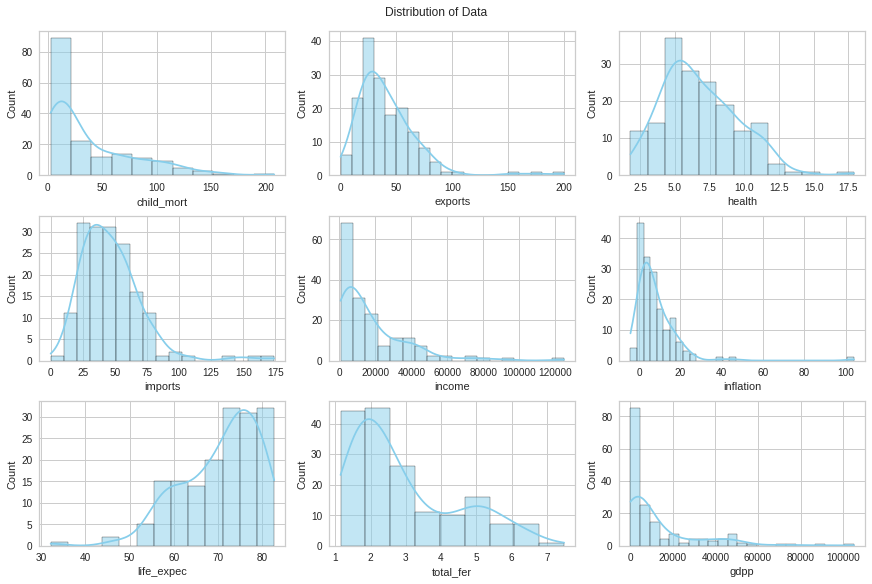

In [41]:
cols = df.select_dtypes(exclude='object').columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Distribution of Data")

for x, i in enumerate(cols):
    sns.histplot(x=df[i], ax=ax[x], kde=True, color=['skyblue'])

CHECKING FOR OUTLIERS

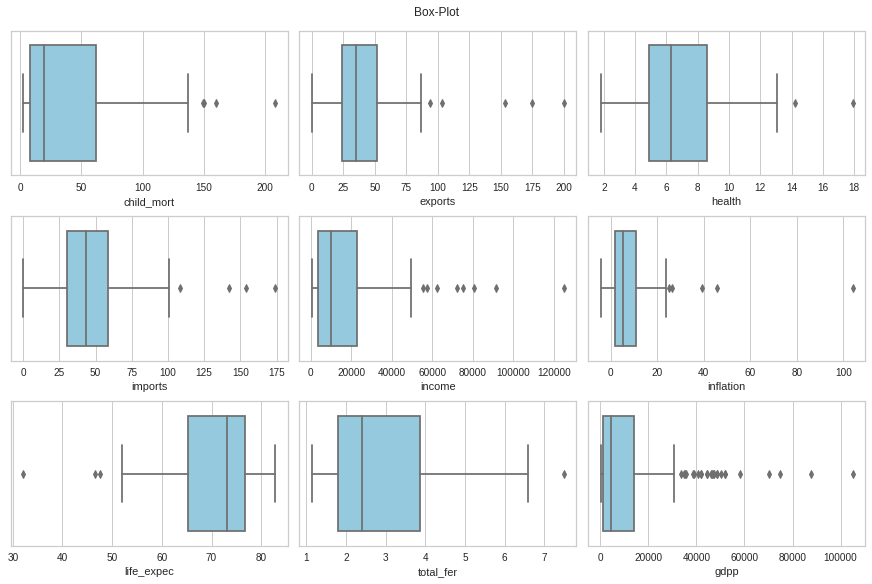

In [42]:
cols = df.select_dtypes(exclude='object').columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Box-Plot")
for x, i in enumerate(cols):
    sns.boxplot(x=df[i], ax=ax[x], palette=['skyblue'])

Feature Correlation

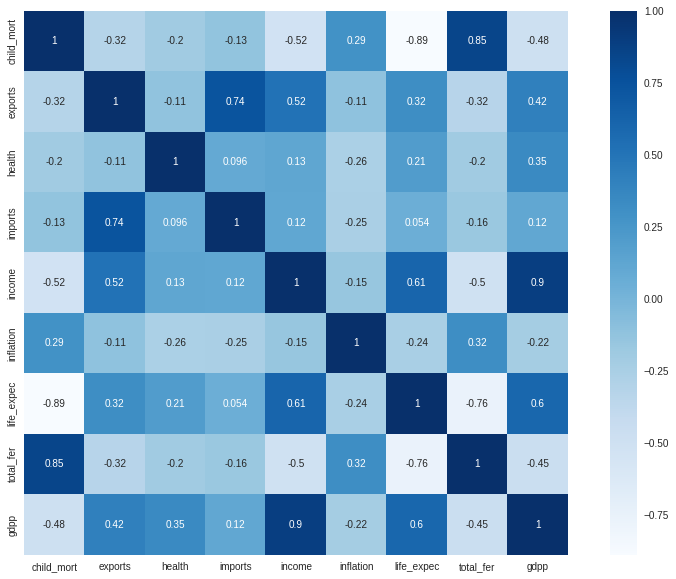

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, square=True, cmap="Blues")
plt.show()

child_mort and total_fer have a strong negative relationship with gdpp (GDP), this indicates that when GDP increases, infant mortality and the number of children decreases and when GDP decreases, infant mortality increases, as well as the number of children born to each women.

exports, health, income and life_expect have a positive relationship with gdpp (GDP), this indicates that as GDP grows these factors also grow together.

child_mort has a positive relationship with total_fer, indicating that when the number of children per woman increases, infant mortality also increases.

child_mort has a negative relationship with life_expec, this indicates that when life expectancy increases, infant mortality decreases.

life_expec has a negative relationship with total_fer, when life expectancy increases the number of children per woman decreases.

income has a positive relationship with life_expect, when net income per person increases, life expectancy also increases.

exports has a positive relationship with income, when the country's exports increase, the net income of each person also increases.

It appears that the factors child_mort, total_fer, exports, health, income and life_expect play a vital role in the socioeconomic status of a country.

Based on this, the decision to choose a country that needs help is also based on these factors.

**Finding the top 5 countries that show low values for the above given variables**

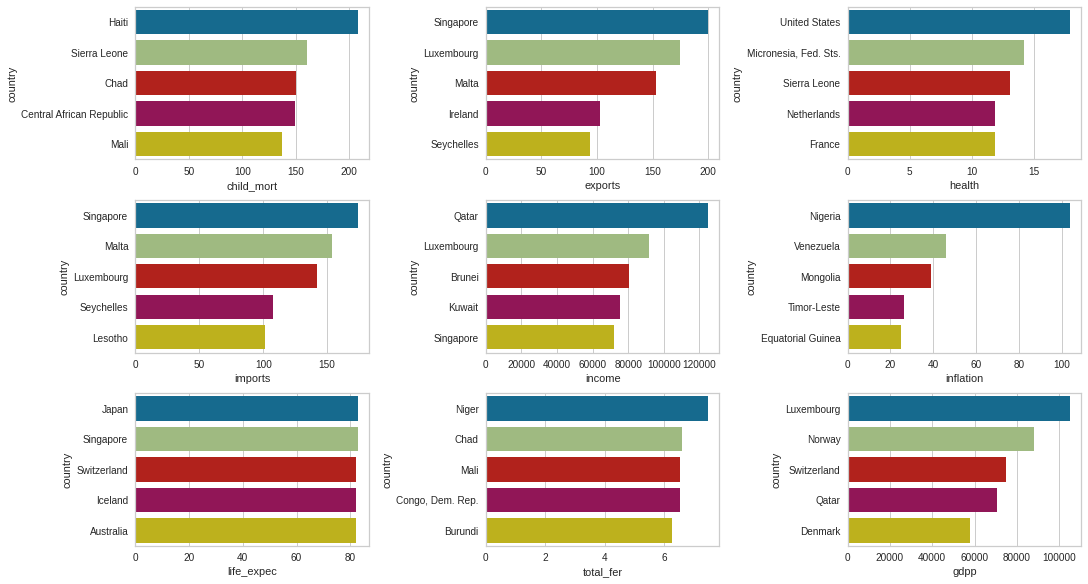

In [37]:
cols = df.drop(['country'], axis=1).columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
ax = ax.flatten()
for x, i in enumerate(cols):
    df_new = df[['country', i]].sort_values(by=i,ascending=False)
    df_new = df_new.iloc[0:5,:]
    sns.barplot(data=df_new, x=i, y='country', ax=ax[x])

**Showing the top countries that show high values for all variables**

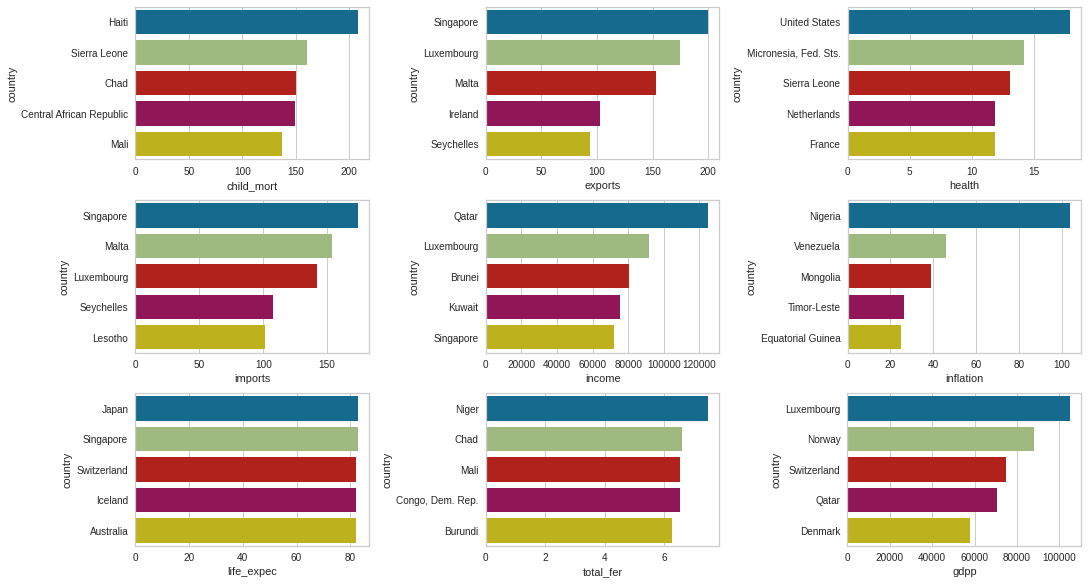

In [46]:
cols = df.drop(['country'], axis=1).columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
ax = ax.flatten()
for x, i in enumerate(cols):
    df_new = df[['country', i]].sort_values(by=i,ascending=False)
    df_new = df_new.iloc[0:5,:]
    sns.barplot(data=df_new, x=i, y='country', ax=ax[x])

**Data Preprocessing**

In [48]:
# NORMALIZING THE DATA
X = StandardScaler().fit_transform(df.drop(columns=["country"], axis=1).values)

In [50]:
cols = df.drop(columns=["country"], axis=1).columns.tolist()

df_scaled = pd.DataFrame(data = X, columns = cols)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


**K-MEANS CLUSTERING**

The "elbow" method is used to select the optimal number of clusters, fitting the model with a range of values ​​for K.

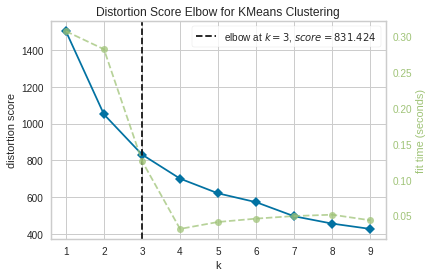

In [54]:
visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42), k=(1,10))
visualizer.fit(X)
visualizer.show()        

Optimal number of clusters is determined to be 3

K-MEANS

In [58]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
k_means = kmeans.fit(X)

print("{} \n{} \n{} \n{}".format(k_means.n_clusters, k_means.cluster_centers_ , k_means.labels_, k_means.inertia_))

3 
[[-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]] 
[1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1] 
831.4244352086876


Append the cluster label to the origial data

In [59]:
df_kmeans = df.copy()
df_kmeans["country"] = df["country"]
df_kmeans["clusters"] = k_means.labels_
df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


**Determining the priority of countries in each cluster**

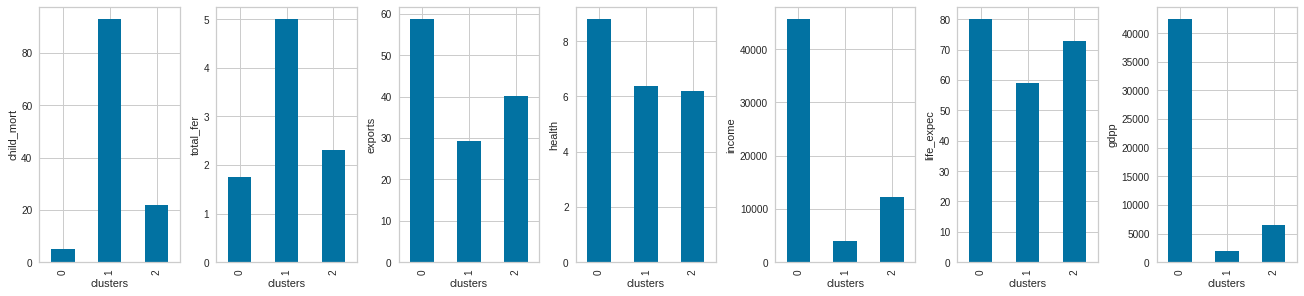

In [60]:

cols = ["child_mort", "total_fer", "exports", "health", "income", "life_expec", "gdpp"]

fig, ax = plt.subplots(ncols=7, figsize=(18,4), constrained_layout=True)

df_kmeans.groupby(['clusters']).mean()["child_mort"].T.plot(kind='bar', ax=ax[0], xlabel="clusters", ylabel="child_mort")
df_kmeans.groupby(['clusters']).mean()["total_fer"].T.plot(kind='bar', ax=ax[1], xlabel="clusters", ylabel="total_fer")
df_kmeans.groupby(['clusters']).mean()["exports"].T.plot(kind='bar', ax=ax[2], xlabel="clusters", ylabel="exports")
df_kmeans.groupby(['clusters']).mean()["health"].T.plot(kind='bar', ax=ax[3], xlabel="clusters", ylabel="health")
df_kmeans.groupby(['clusters']).mean()["income"].T.plot(kind='bar', ax=ax[4], xlabel="clusters", ylabel="income")
df_kmeans.groupby(['clusters']).mean()["life_expec"].T.plot(kind='bar', ax=ax[5], xlabel="clusters", ylabel="life_expec")
df_kmeans.groupby(['clusters']).mean()["gdpp"].T.plot(kind='bar', ax=ax[6], xlabel="clusters", ylabel="gdpp")
plt.show()

Based on the main socioeconomic and health factors, we can see from the graph that the countries in cluster 1 are the most lacking in humanitarian resources.

**Semantic meaning of clusters and visualization**

In [61]:
df_kmeans["clusters_labels"] = df_kmeans["clusters"].map({0: "don't need help", 1: 'Need help', 2: 'Might Need Help'})

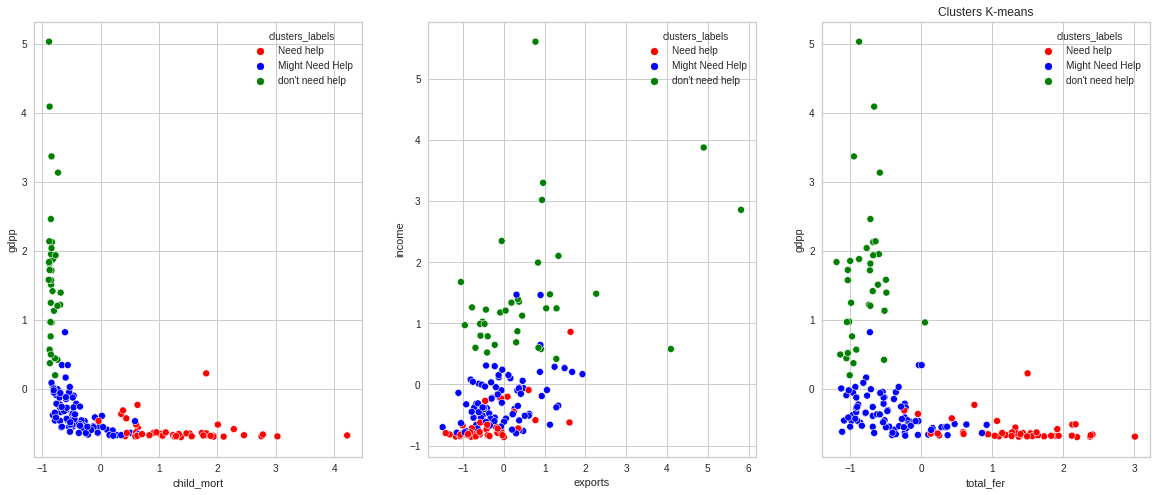

In [62]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.scatterplot(data=df_scaled, x='child_mort', y='gdpp', hue=df_kmeans["clusters_labels"], ax=ax[0], palette=["red", "blue", "green"])
sns.scatterplot(data=df_scaled, x='exports', y='income', hue=df_kmeans["clusters_labels"], ax=ax[1], palette=["red", "blue", "green"])
sns.scatterplot(data=df_scaled, x='total_fer', y='gdpp', hue=df_kmeans["clusters_labels"], ax=ax[2], palette=["red", "blue", "green"])
plt.title("Clusters K-means")
plt.show()


PCA Implementation

In [65]:
pca = PCA().fit(X)
pca.n_components_, pca.explained_variance_ratio_

(9, array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
        0.02484235, 0.0126043 , 0.00981282, 0.00743056]))

The variance tells you how much information can be assigned to each of the major components.

Using the explained_variance_ratio_ attribute, you can see that the first principal component contains 46% of the variance, the second principal component contains 17% of the variance, the third principal component contains 13% of the variance, and the fourth principal component contains 11% of the variance. Together, the four components contain 87% of the information.

A rule of thumb is to preserve about 80% of the variance. So in this case we decided to keep 4 components.

Plotting variance of the components

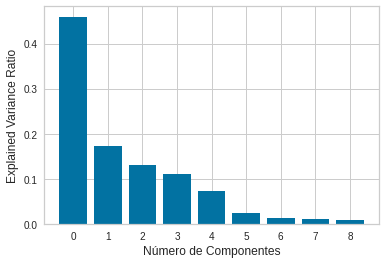

In [66]:
features = range(pca.n_components_) 
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel('Number of Components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
plt.show()

CUMULATIVE VARIANCE

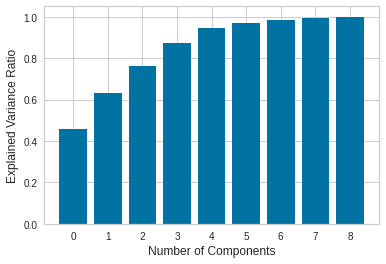

In [67]:
features = range(pca.n_components_) 
plt.bar(features, pca.explained_variance_ratio_.cumsum())
plt.xticks(features)
plt.xlabel('Number of Components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
plt.show()

CALCULATING SCORES FOR ALL COMPONENTS

In [68]:
principalComponentes = pca.fit_transform(X) # Calculates scores for components

df_p = pd.DataFrame(principalComponentes)
df_p = pd.concat([df_p, df[["country"]]], axis=1)
df_p.head()

,0,1,2,3,4,5,6,7,8,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270,Antigua and Barbuda


PCA WITH THE NUMBER OF COMPONENTS CHOSEN


In [70]:
pca = PCA(n_components=4)
principalComponentes = pca.fit_transform(X) # Calculates scores for components
df_pca = pd.DataFrame(principalComponentes, columns=['Component_1', 'Component_2', 'Component_3', 'Component_4'])
df_pca.head()

,Component_1,Component_2,Component_3,Component_4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


We will incorporate the newly obtained PCA scores into the K-means algorithm. And so, we can perform segmentation based on the scores of the core components instead of the original features.

**K-MEANS PCA**

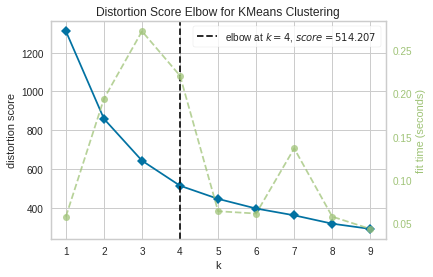

In [71]:
visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42), k=(1, 10))
visualizer.fit(df_pca.iloc[:,:4])        
visualizer.show()  

The Elbow method points out that the ideal value for the k of K-means with PCA is 4

**Silhouette**

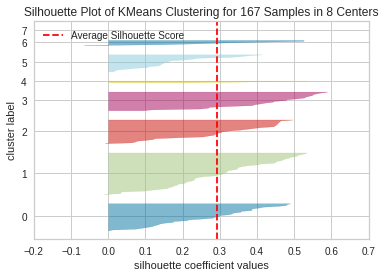

In [72]:
visualizer = SilhouetteVisualizer(KMeans(init="k-means++", random_state=42), colors='yellowbrick')
visualizer.fit(df_pca.iloc[:,:4])        
visualizer.show() 

The Silhouette analysis done in the above graph also aims to select an optimal value for the number of clusters.

The value of 4 clusters seems to be ideal as the silhouette score for each cluster is above the average silhouette score.

Furthermore, the thickness of the silhouette plot representing each cluster is also a decisive point. It is observed that the graphs are uniform in the first 4 clusters.

Thus, one can select the optimal number of clusters as 4.


**K-MEANS**

In [73]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans_pca = kmeans.fit(df_pca.iloc[:,:4])

print("{} \n{} \n{} \n{}".format(kmeans_pca.n_clusters, kmeans_pca.cluster_centers_ , kmeans_pca.labels_, kmeans_pca.inertia_))

4 
[[ 2.56872337 -0.8250807   0.05511883  0.9375869 ]
 [-2.43461995  0.41127566 -0.09616666  0.69171004]
 [ 0.21414    -0.11685901  0.02530472 -0.74760161]
 [ 5.46022462  5.43247334  0.21164795  0.90605761]] 
[1 2 2 1 2 2 2 0 0 2 2 2 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 3 2 1 1 2 2 1 3 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 3 2 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1] 
514.2073501405218


ANALYSIS OF RESULTS

Inertia K-means: 831.4244352086876
PCA K-Means: 514.2073501405218

K-means with PCA obtained a lower inertia. Therefore, let's consider categorizing K-means countries with PCA.

In [74]:
df_pca_kmeans = df.copy()
df_pca_kmeans["country"] = df["country"]
df_pca_kmeans["clusters_pca"] = kmeans_pca.labels_
df_pca_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


IDENTIFYING THE PRIORITY OF COUNTRIES IN EACH CLUSTER

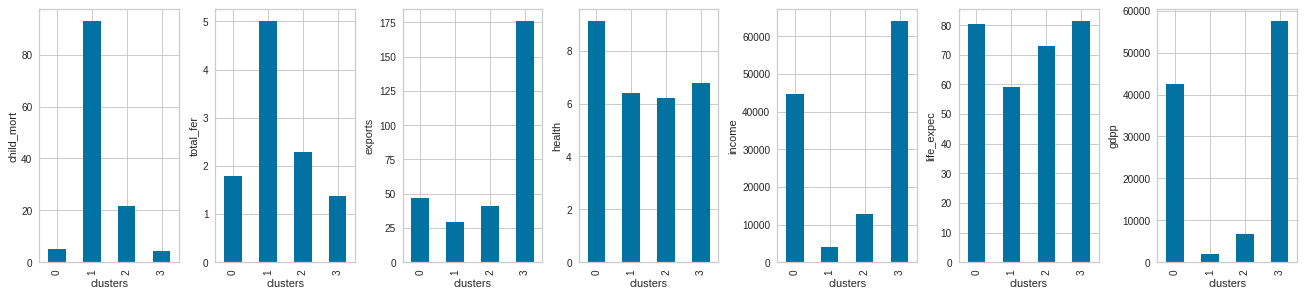

In [75]:
cols = ["child_mort", "total_fer", "exports", "health", "income", "life_expec", "gdpp"]

fig, ax = plt.subplots(ncols=7, figsize=(18,4), constrained_layout=True)

df_pca_kmeans.groupby(['clusters_pca']).mean()["child_mort"].T.plot(kind='bar', ax=ax[0], xlabel="clusters", ylabel="child_mort")
df_pca_kmeans.groupby(['clusters_pca']).mean()["total_fer"].T.plot(kind='bar', ax=ax[1], xlabel="clusters", ylabel="total_fer")
df_pca_kmeans.groupby(['clusters_pca']).mean()["exports"].T.plot(kind='bar', ax=ax[2], xlabel="clusters", ylabel="exports")
df_pca_kmeans.groupby(['clusters_pca']).mean()["health"].T.plot(kind='bar', ax=ax[3], xlabel="clusters", ylabel="health")
df_pca_kmeans.groupby(['clusters_pca']).mean()["income"].T.plot(kind='bar', ax=ax[4], xlabel="clusters", ylabel="income")
df_pca_kmeans.groupby(['clusters_pca']).mean()["life_expec"].T.plot(kind='bar', ax=ax[5], xlabel="clusters", ylabel="life_expec")
df_pca_kmeans.groupby(['clusters_pca']).mean()["gdpp"].T.plot(kind='bar', ax=ax[6], xlabel="clusters", ylabel="gdpp")
plt.show()


Based on the main socioeconomic factors (exports, income and gdpp) and health (child_mort, total_fer, health, life_expec), we can see from the graph that the countries in cluster 1 are the most lacking in humanitarian resources, as they have:

the highest infant mortality rate

the highest rate of children that would be born to each woman

the lowest export rate of goods and services

the lowest net income per person

lowest life expectancy rate

the lowest GDP per capita

PRIORITY OF COUNTRIES IN EACH CLUSTER

In [77]:
df_pca_kmeans["clusters_labels"] = df_pca_kmeans["clusters_pca"].map({0: "Priority 3", 1:"Priority 1", 2:"Priority 2", 3:"Priority 4"}) 

VIEW CLUSTERS BY PCA COMPONENTS

Let's finish by visualizing our clusters in a 2D plane. In a 2D view, we need to choose two components and use them as axes.

The purpose of the PCA was to determine the most important components.

Dessa forma, podemos ter certeza absoluta de que os dois primeiros componentes explicam mais variância do que o terceiro.



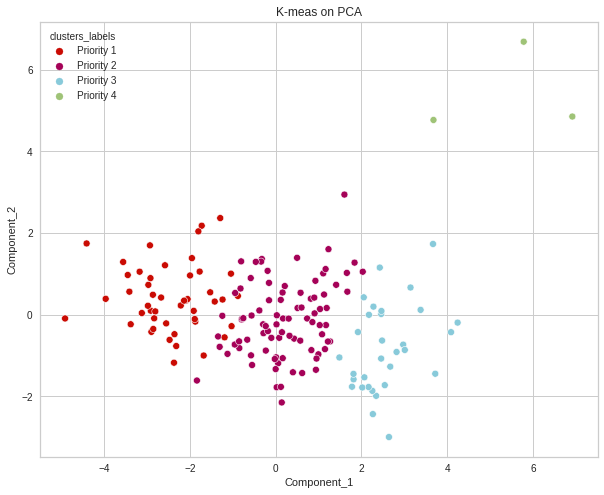

In [78]:
x_axis = df_pca["Component_1"]
y_axis = df_pca["Component_2"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_pca_kmeans["clusters_labels"] , palette=['r', 'm', 'c', 'g'])
plt.title("K-meas on PCA")
plt.show()

**FINAL CONSIDERATIONS**

The CEO should focus on countries belonging to cluster 1 of the model with K=4.

In [79]:
fig = px.choropleth(data_frame=df_pca_kmeans, locationmode= 'country names', locations='country', color=df_pca_kmeans['clusters_labels'], title='Countries by category that need help',
color_discrete_map={"Priority 3":'blue', "Priority 1": 'red', "Priority 2": 'orange', "Priority 4":'green'},projection='equirectangular',  height=500, width=1200)
fig.show()

LIST OF COUNTRIES WITH PRIORITY 1

In [80]:
df_pca_kmeans[df_pca_kmeans['clusters_labels']=='Priority 1'][['country']]

,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


LIST OF COUNTRIES WITH PRIORITY 2

In [81]:
df_pca_kmeans[df_pca_kmeans['clusters_labels']=='Priority 2'][['country']]

,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
...,...
160,Uruguay
161,Uzbekistan
162,Vanuatu
163,Venezuela


LIST OF COUNTRIES WITH PRIORITY 3

In [82]:
df_pca_kmeans[df_pca_kmeans['clusters_labels']=='Priority 3'][['country']]

,country
7,Australia
8,Austria
15,Belgium
23,Brunei
29,Canada
42,Cyprus
43,Czech Republic
44,Denmark
53,Finland
54,France


LIST OF COUNTRIES WITH PRIORITY 4

In [83]:
df_pca_kmeans[df_pca_kmeans['clusters_labels']=='Priority 4'][['country']]

,country
91,Luxembourg
98,Malta
133,Singapore
